# Use simulation to quickly evaluate job offers with statistics

Let’s suppose you are considering various job offers. The challenge in making a decision is that there always is some uncertainty. For instance, you do not always know exactly what you will be doing, who will be your colleagues, how this job will help in your career advancement, etc.

That’s where Monte Carlo comes in. Here are the three steps to follow to set up the experiment.

- Define variables that go into making a decision (salary, conditions, location, work-life balance, etc.)
- Define the importance (weight) of each variable. In other words, what is most important to you?
    For each option and for each variable, define a range of possibility on whatever scale you feel is appropriate (out of 10 in this example). Of course, the wider the range, the more uncertain it means you are with the grade you have given to this variable! The range represents the probability distribution of the variable.
    
What is interesting with this approach is that it can help you realize bias you might subconsciously have about your various options. Indeed, by grading all the variables on their own, you might realize that an option comes out on top in most aspects.

In [23]:
# Import packages
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
def simulate(grades, variables: list, iterations = 10000):
    final_results = []
    weights = [0.15, 0.15, 0.05, 0.15, 0.15, 0.03, 0.1, 0.02, 0.15, 0.05]
    print(f"Sum of Weights: {sum(weights)}")
    
    for n in range(iterations):
        results = []
        for i in range(len(variables)):
            value = weights[i] * (random.uniform(grades[i][0], grades[i][1]))
            results.append(value)
            
        final_results.append(sum(results))
        
    return final_results

In [25]:
iters = 10000
variables = ['work', 'salary', 'conditions', 'career_advancement', 'social_impact', 'job_security', 
           'life_balance', 'location', 'atmosphere', 'travel']

a = simulate([[4, 9], [8.5, 10], [5, 9], [8.5, 9.5], [3, 7], [4, 9], [3, 8], [7.5, 8], [5, 9], [0, 6]], 
             variables, iters)
b = simulate([[5, 10], [4, 4], [7, 9], [2, 8], [6, 9.5], [8.5, 10], [8, 10], [0, 7], [3, 9], [0, 3]], 
             variables, iters)
c = simulate([[4, 7], [6, 8], [6, 9], [6.5, 9], [2, 6], [6.5, 9], [5.5, 9], [9.5, 9.5], [5, 9], [4, 9]], 
             variables, iters)

Sum of Weights: 1.0
Sum of Weights: 1.0
Sum of Weights: 1.0


/home/slave/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/slave/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/slave/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

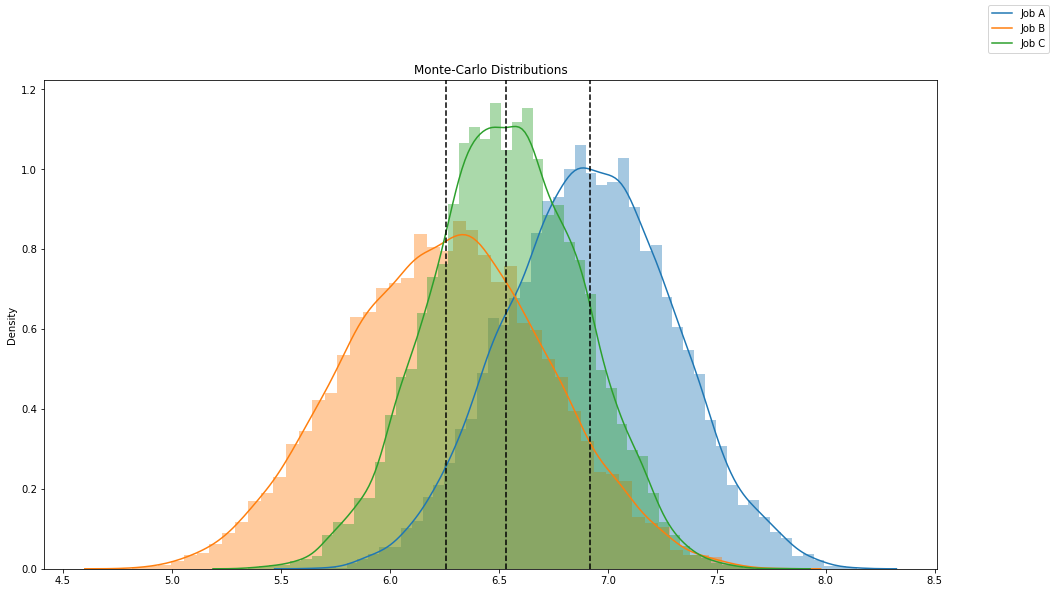

In [26]:
# Plot the results
fig = plt.figure(figsize=(16, 9))
sns.distplot(a)
sns.distplot(b)
sns.distplot(c)
labels = ['Job A', 'Job B', 'Job C']
fig.legend(labels = labels)
plt.axvline(x = sum(a)/len(a), color = 'black', ls='--')
plt.axvline(x = sum(b)/len(b), color = 'black', ls='--')
plt.axvline(x = sum(c)/len(c), color = 'black', ls='--')
plt.title('Monte-Carlo Distributions')
plt.show()

There appears to be two favorites, jobs A and C. What is interesting is that job A has a much larger distribution, while job C seems to be more secure, likely because there is less uncertainty.

The simulation has allowed us to compare the various options over multiple iterations to determine how risky those options really are. Now the job seeker can improve his or her assessment regarding whether the extra risk associated with an option is worth the reward.